7.21 ARX model with sparse excitation

In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [2]:
import scipy.linalg as la
from numpy.random import RandomState
from scipy import signal

# Parameters
M = 10;
T=200;
N = 3*T;
p = 0.2;
rn = RandomState(364)

beta_true = 2*rn.rand(M)-1
beta_true = beta_true/la.norm(beta_true,1)
x_true = (rn.rand(N) < p) *rn.randn(N)

y_shifted = np.zeros(N+M);
# Shift y by M, then generate y using AR model
for t in range(N):
    y_shifted[t+M] = x_true[t]+ np.sum(np.flipud(beta_true)*y_shifted[t+M-M:t+M])
# Only observe a length T subsequence.
y= y_shifted[1+T+M:1+T+T+M]

In [8]:
# assume excitation signal x_t is iid gaussian
b = cp.Variable(M+1) # b = (1, -beta)
objective = cp.Minimize(cp.sum_squares(cp.conv(y,b)[10:200]))
constraints = [b[0] == 1]
prob = cp.Problem(objective, constraints)
result = prob.solve()
beta_ml = - b.value[1:]

In [9]:
# assume x_t is sparse
b = cp.Variable(M+1) # b = (1, -beta)
objective = cp.Minimize(cp.norm(cp.conv(y,b)[10:200], 1)) # since input signal is sparse, we minimize the l1 norm
constraints = [b[0] == 1]
prob = cp.Problem(objective, constraints)
result = prob.solve()
beta_sparse = - b.value[1:]

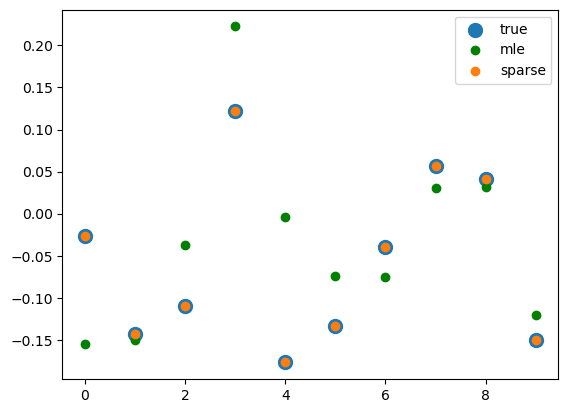

In [23]:
plt.scatter(range(len(beta_true)), beta_true, label='true', s=100)
plt.scatter(range(len(beta_true)), beta_ml, label='mle', c='g')
plt.scatter(range(len(beta_true)), beta_sparse, label='sparse')
plt.legend()
plt.show()